CASE STUDY 1
CONTRIBUTOR: MURAD ISMAYILZADA UMCS

In [2]:
# pip install pandas matplotlib seaborn scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 600) 


In [3]:
cust = pd.read_csv("casestudy1_MuradIsmayilzadaCustomer.csv") #customer details
trans = pd.read_csv("casestudy1_MuradIsmayilzadaTransaction.csv") #transaction

In [4]:
trans.head()

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [5]:
cust.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [6]:
cust.info(),trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              168 non-null    int64 
 1   customerEmail           168 non-null    object
 2   customerPhone           168 non-null    object
 3   customerDevice          168 non-null    object
 4   customerIPAddress       168 non-null    object
 5   customerBillingAddress  168 non-null    object
 6   No_Transactions         168 non-null    int64 
 7   No_Orders               168 non-null    int64 
 8   No_Payments             168 non-null    int64 
 9   Fraud                   168 non-null    bool  
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            -----

(None, None)

In [7]:
# Merge the dataframes on the 'customerEmail' column
merged_df = pd.merge(cust, trans, on='customerEmail', how='inner')

# Verify the merged dataframe
merged_df.head()

,Unnamed: 0_x,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Unnamed: 0_y,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,0,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,1,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,2,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,3,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,4,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [8]:
# Remove the specified columns
merged_df = merged_df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])
merged_df.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


EDA On the Merged _DF
1.Basic Information about the dataset

In [9]:
# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(merged_df.head())

# Get basic information about the dataframe
print("\nSummary of the dataframe:")
print(merged_df.info())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(merged_df.describe())

# Check for missing values
print("\nMissing values in the dataframe:")
print(merged_df.isnull().sum())

First few rows of the dataframe:
            customerEmail   customerPhone        customerDevice  \
0  josephhoward@yahoo.com    400-108-5415  yyeiaxpltf82440jnb3v   
1  josephhoward@yahoo.com    400-108-5415  yyeiaxpltf82440jnb3v   
2  evansjeffery@yahoo.com  1-788-091-7546  r0jpm7xaeqqa3kr6mzum   
3  evansjeffery@yahoo.com  1-788-091-7546  r0jpm7xaeqqa3kr6mzum   
4  evansjeffery@yahoo.com  1-788-091-7546  r0jpm7xaeqqa3kr6mzum   

  customerIPAddress                             customerBillingAddress  \
0      8.129.104.40            5493 Jones Islands\nBrownside, CA 51896   
1      8.129.104.40            5493 Jones Islands\nBrownside, CA 51896   
2   219.173.211.202  356 Elizabeth Inlet Suite 120\nPort Joshuabury...   
3   219.173.211.202  356 Elizabeth Inlet Suite 120\nPort Joshuabury...   
4   219.173.211.202  356 Elizabeth Inlet Suite 120\nPort Joshuabury...   

   No_Transactions  No_Orders  No_Payments  Fraud transactionId orderId  \
0                2          2            1  

2. Data Distribution and Visualization:


<Figure size 1000x600 with 0 Axes>

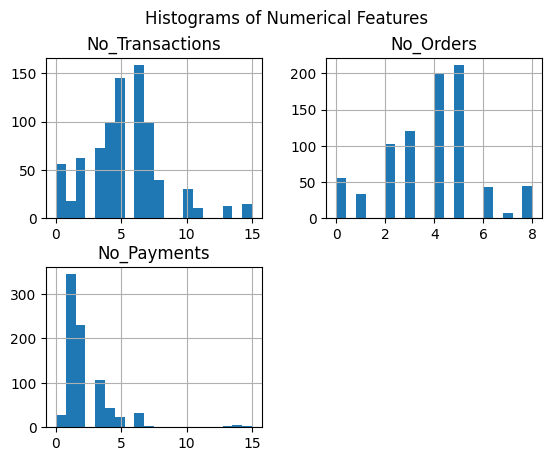

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = ['No_Transactions', 'No_Orders', 'No_Payments']
# Histograms for numerical features
plt.figure(figsize=(10, 6))
merged_df[numerical_features].hist(bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()

c:\Users\zirad\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\zirad\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\zirad\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\zirad\AppData\Local\Programs\Python\Python312

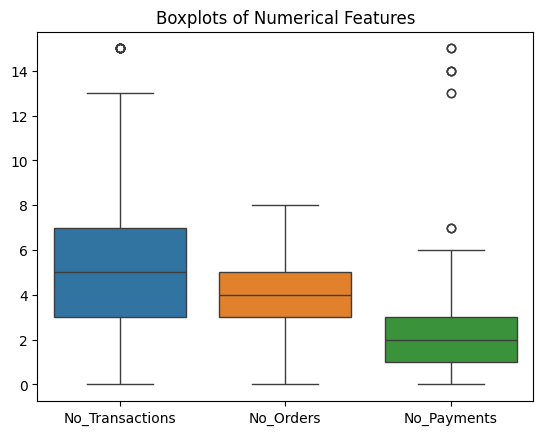

In [11]:
# Boxplots for numerical features
sns.boxplot(data=merged_df[numerical_features])
plt.title('Boxplots of Numerical Features')
plt.show()

As there are Outliers in the No_Payments and No_Orders columns, Removing is the best solution for proper further analysis

In [12]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = merged_df[numerical_features].quantile(0.25)
Q3 = merged_df[numerical_features].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (merged_df[numerical_features] < lower_bound) | (merged_df[numerical_features] > upper_bound)

# Remove outliers
merged_df_cleaned = merged_df[~outliers.any(axis=1)]
merged_df_cleaned.shape

(792, 18)

Given that the outliers constitute only about 3.3% of the total data (27 out of 819 rows), and without a clear understanding of their origin or impact, I lean towards removing them. Removing outliers in this scenario seems reasonable as it's a relatively small portion of the dataset and their presence may potentially distort the analysis or model performance. However, it's important to document this decision and consider the potential implications of removing outliers on the overall analysis.


In [13]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = merged_df[numerical_features].quantile(0.25)
Q3 = merged_df[numerical_features].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (merged_df[numerical_features] < lower_bound) | (merged_df[numerical_features] > upper_bound)

# Get rows containing outliers
outlier_rows = merged_df[outliers.any(axis=1)]


outlier_rows.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
2,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled
338,cathy42@gibson.com,754.248.6239x43965,c3r2qzqwc9anp6utob7n,7493:ab04:47ff:3a14:67d6:a128:a5b6:1500,"046 Carson Crescent\nSouth Jacksonview, NV 228...",3,3,15,True,h469bpo6,d5r0n3,d1nvhtt2q,0,card,Diners Club / Carte Blanche,14,0,fulfilled
339,cathy42@gibson.com,754.248.6239x43965,c3r2qzqwc9anp6utob7n,7493:ab04:47ff:3a14:67d6:a128:a5b6:1500,"046 Carson Crescent\nSouth Jacksonview, NV 228...",3,3,15,True,vj05ozm5,8lc2cq,d1nvhtt2q,0,card,Diners Club / Carte Blanche,23,0,fulfilled


In [14]:
additional_categorical_features = ['paymentMethodRegistrationFailure', 'paymentMethodType', 'paymentMethodProvider', 'transactionFailed', 'orderState']

# Store the numerical counts for each category in a dictionary
numerical_counts = {}
for feature in additional_categorical_features:
    counts = merged_df_cleaned[feature].value_counts()
    numerical_counts[feature] = counts

# Display numerical counts
for feature, counts in numerical_counts.items():
    print(f'Numerical counts for {feature}:')
    print(counts)
    print()

Numerical counts for paymentMethodRegistrationFailure:
paymentMethodRegistrationFailure
0    713
1     79
Name: count, dtype: int64

Numerical counts for paymentMethodType:
paymentMethodType
card         626
bitcoin       64
paypal        55
apple pay     47
Name: count, dtype: int64

Numerical counts for paymentMethodProvider:
paymentMethodProvider
JCB 16 digit                   167
VISA 16 digit                  165
Maestro                        103
Voyager                         81
American Express                62
VISA 13 digit                   57
JCB 15 digit                    45
Discover                        41
Diners Club / Carte Blanche     40
Mastercard                      31
Name: count, dtype: int64

Numerical counts for transactionFailed:
transactionFailed
0    596
1    196
Name: count, dtype: int64

Numerical counts for orderState:
orderState
fulfilled    671
failed        84
pending       37
Name: count, dtype: int64



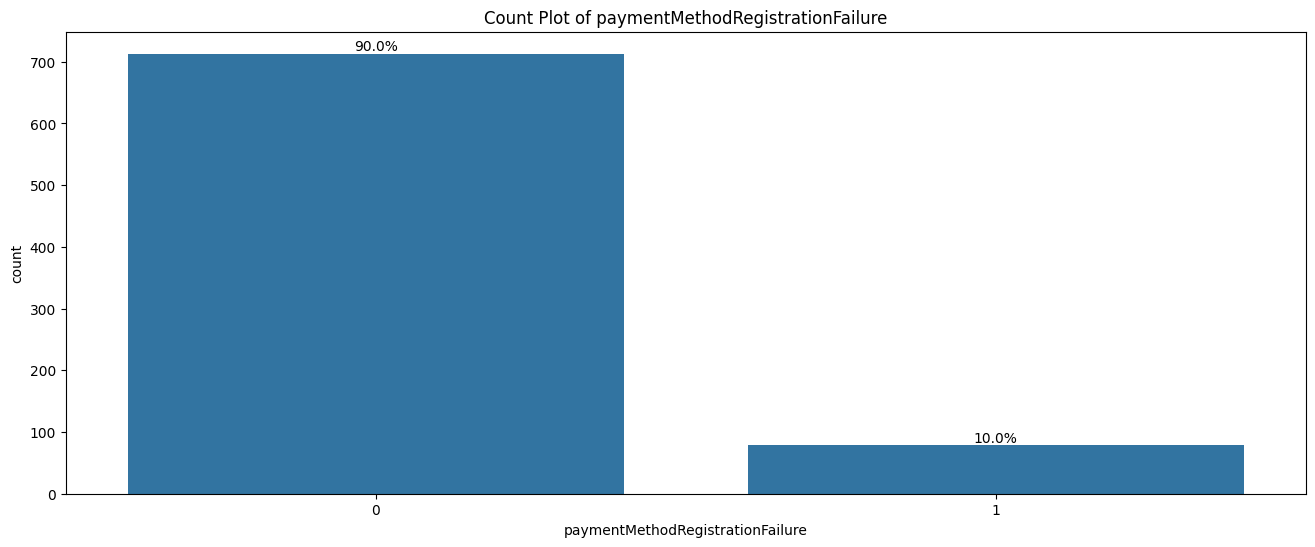

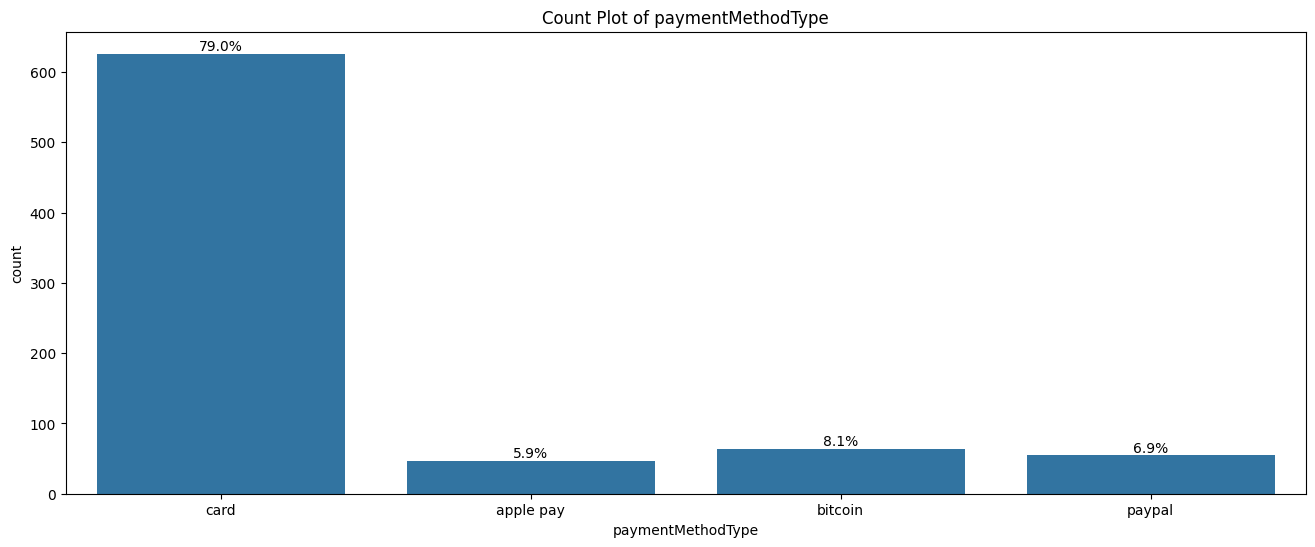

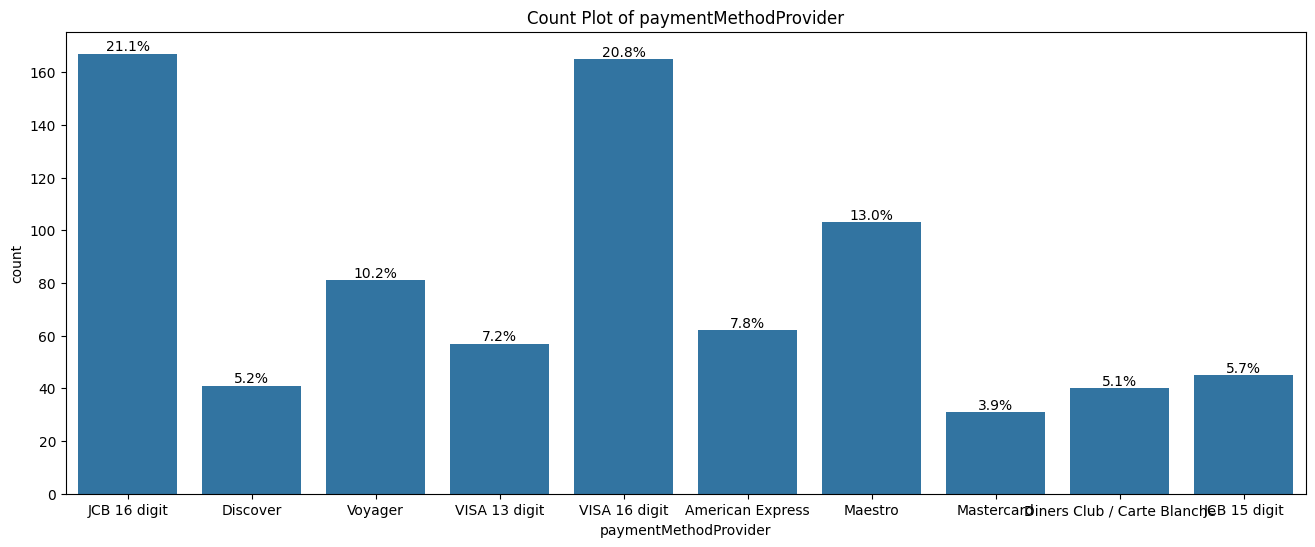

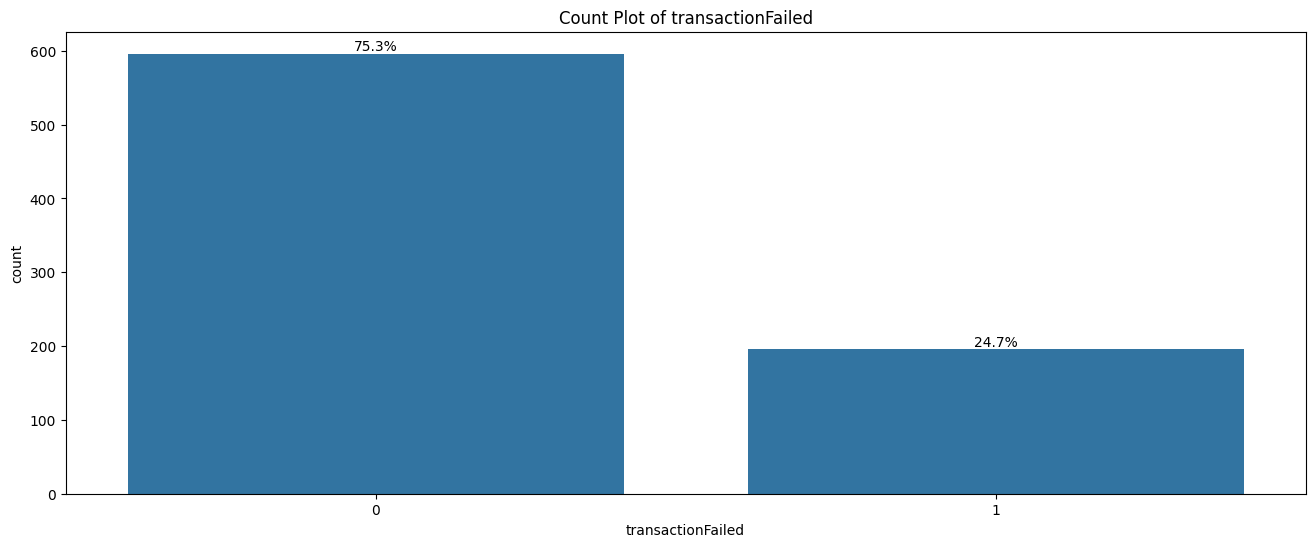

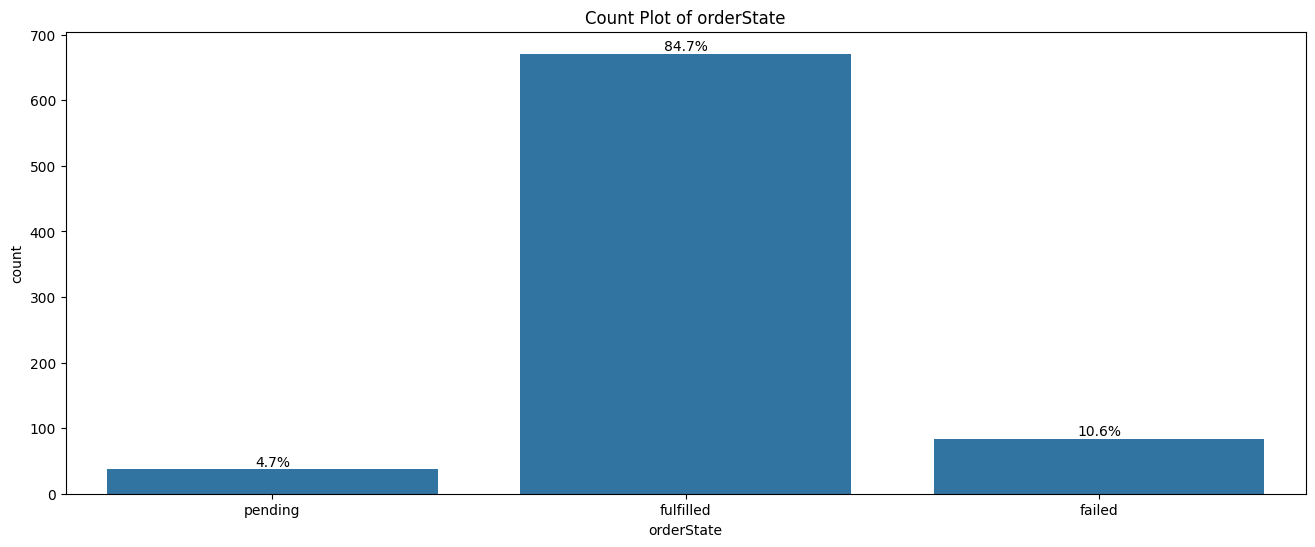

In [15]:
additional_categorical_features = ['paymentMethodRegistrationFailure', 'paymentMethodType', 'paymentMethodProvider', 'transactionFailed', 'orderState']

for feature in additional_categorical_features:
    plt.figure(figsize=(16, 6))
    ax = sns.countplot(data=merged_df_cleaned, x=feature)

    # Calculate percentages for each category
    total_count = len(merged_df_cleaned)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.title(f'Count Plot of {feature}')
    plt.show()

somthing 

In [16]:
merged_df_cleaned


,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
5,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,q3lyvbza,yk34y2,8pneoi03z,0,card,JCB 16 digit,33,0,failed
6,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,3alf9irw,28v6b0,8pneoi03z,0,card,JCB 16 digit,24,1,fulfilled
7,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,69w9wymx,28v6b0,8pneoi03z,0,card,JCB 16 digit,24,0,fulfilled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,7yilsi1o,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,1,fulfilled
815,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,c82k5bcv,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,0,fulfilled
816,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,wmh52bns,1bubxa,3zmkegkb8,0,paypal,JCB 15 digit,25,1,fulfilled
817,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,xdw33hfp,p0gdbf,3zmkegkb8,0,paypal,JCB 15 digit,19,0,fulfilled


3. Correlation Analysis

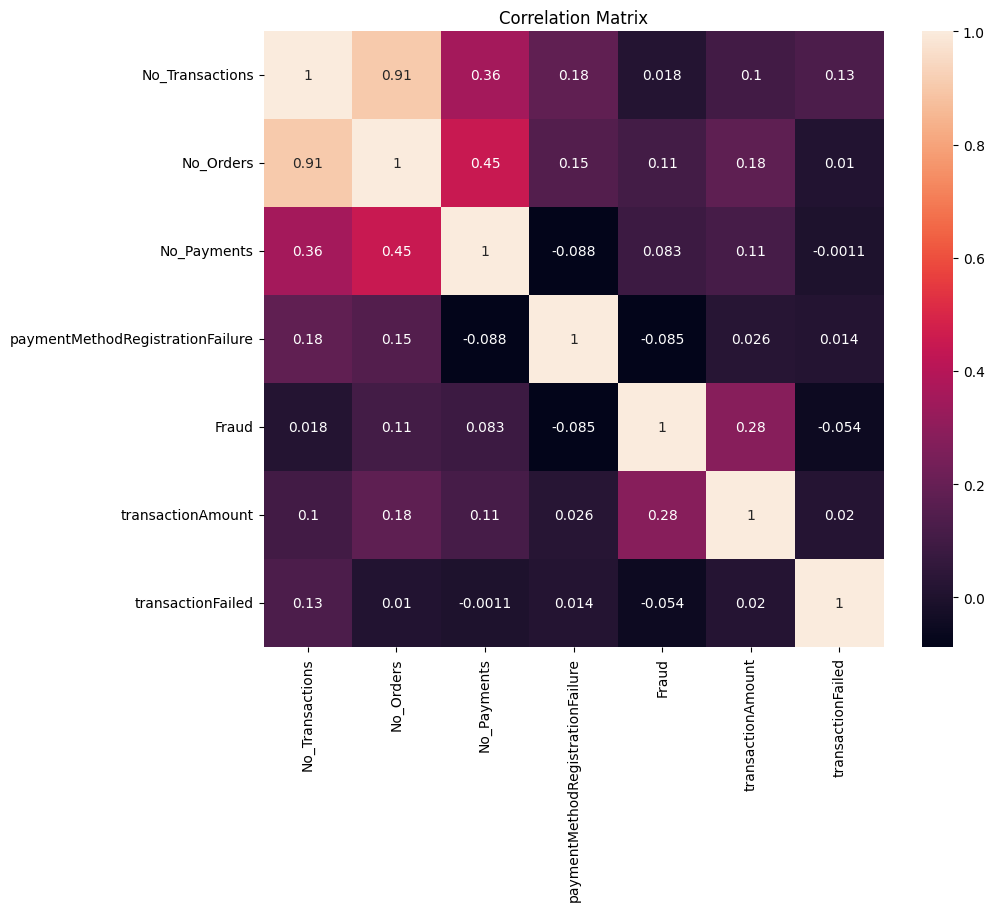

In [17]:
# Correlation matrix
correlation_matrix = merged_df_cleaned[["No_Transactions","No_Orders","No_Payments",
                                        "paymentMethodRegistrationFailure",
                                        "Fraud","transactionAmount","transactionFailed"]].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

Transaction Metrics and Fraud Analysis

c:\Users\zirad\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\zirad\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\zirad\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

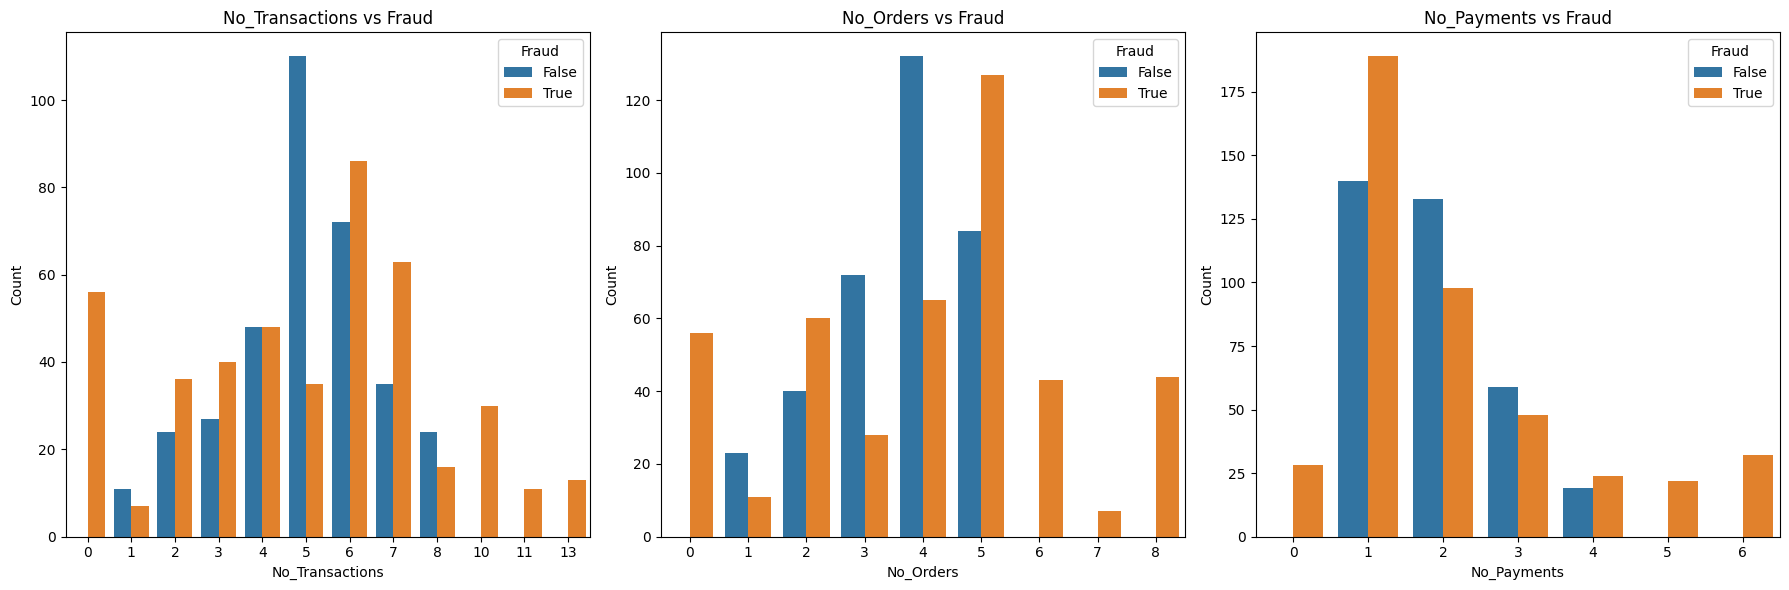

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for No_Transactions
sns.countplot(data=merged_df_cleaned, x='No_Transactions', hue='Fraud', ax=axes[0])
axes[0].set_title('No_Transactions vs Fraud')
axes[0].set_xlabel('No_Transactions')
axes[0].set_ylabel('Count')

# Plot for No_Orders
sns.countplot(data=merged_df_cleaned, x='No_Orders', hue='Fraud', ax=axes[1])
axes[1].set_title('No_Orders vs Fraud')
axes[1].set_xlabel('No_Orders')
axes[1].set_ylabel('Count')

# Plot for No_Payments
sns.countplot(data=merged_df_cleaned, x='No_Payments', hue='Fraud', ax=axes[2])
axes[2].set_title('No_Payments vs Fraud')
axes[2].set_xlabel('No_Payments')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

Feature Engineering

In [19]:
merged_df_cleaned['Transaction_Success_Rate'] = merged_df_cleaned['No_Transactions'] / (merged_df_cleaned['No_Transactions'] + merged_df_cleaned['transactionFailed'])

#Reasoning: This feature captures the proportion of successful transactions for each customer,
#providing insights into their transaction success rate.

C:\Users\zirad\AppData\Local\Temp\ipykernel_6504\961251837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned['Transaction_Success_Rate'] = merged_df_cleaned['No_Transactions'] / (merged_df_cleaned['No_Transactions'] + merged_df_cleaned['transactionFailed'])


2. Order Frequency


In [20]:
#merged_df_cleaned['Order_Frequency'] = merged_df_cleaned['No_Orders'] / merged_df_cleaned['No_Transactions']
#Reasoning: Order frequency gives an idea of how often a customer places orders relative to the number of transactions 
# they make. 
# It could indicate whether a customer tends to make multiple orders per transaction or vice versa.
merged_df_cleaned = merged_df_cleaned.copy()
merged_df_cleaned['Order_Frequency'] = merged_df_cleaned['No_Orders'] / merged_df_cleaned['No_Transactions']


Historical behavior

In [21]:
merged_df_cleaned['Past_Fraud_Transactions'] = merged_df_cleaned['Fraud'].cumsum().shift(fill_value=0)
#Reasoning:It provides insight into a customer's historical involvement in fraudulent activities.

Feature importance

In [22]:
# Fill NaN values with 0
data = merged_df_cleaned.fillna(0)

pd.set_option('display.max_columns', None)

data.columns

Index(['customerEmail', 'customerPhone', 'customerDevice', 'customerIPAddress',
       'customerBillingAddress', 'No_Transactions', 'No_Orders', 'No_Payments',
       'Fraud', 'transactionId', 'orderId', 'paymentMethodId',
       'paymentMethodRegistrationFailure', 'paymentMethodType',
       'paymentMethodProvider', 'transactionAmount', 'transactionFailed',
       'orderState', 'Transaction_Success_Rate', 'Order_Frequency',
       'Past_Fraud_Transactions'],
      dtype='object')

In [23]:
data.select_dtypes(include=['object']).columns.tolist()


['customerEmail',
 'customerPhone',
 'customerDevice',
 'customerIPAddress',
 'customerBillingAddress',
 'transactionId',
 'orderId',
 'paymentMethodId',
 'paymentMethodType',
 'paymentMethodProvider',
 'orderState']

In [24]:
#cat_cols contains the names of categorical columns
cat_cols = ['customerEmail',
 'customerPhone',
 'customerDevice',
 'customerIPAddress',
 'customerBillingAddress',
 'transactionId',
 'orderId',
 'paymentMethodId',
 'paymentMethodType',
 'paymentMethodProvider',
 'orderState'] 

# Create a copy of the DataFrame to avoid modifying the original data
data_encoded = data.copy()

# Iterate over each categorical column
for col in cat_cols:
    # Calculate the frequency of each category
    freq = data_encoded[col].value_counts(normalize=True)
    
    # Map the frequency values to the original categories
    data_encoded[col + '_freq_encoded'] = data_encoded[col].map(freq)

# Drop the original categorical columns if needed
data_encoded.drop(cat_cols, axis=1, inplace=True)
data_encoded.columns

Index(['No_Transactions', 'No_Orders', 'No_Payments', 'Fraud',
       'paymentMethodRegistrationFailure', 'transactionAmount',
       'transactionFailed', 'Transaction_Success_Rate', 'Order_Frequency',
       'Past_Fraud_Transactions', 'customerEmail_freq_encoded',
       'customerPhone_freq_encoded', 'customerDevice_freq_encoded',
       'customerIPAddress_freq_encoded', 'customerBillingAddress_freq_encoded',
       'transactionId_freq_encoded', 'orderId_freq_encoded',
       'paymentMethodId_freq_encoded', 'paymentMethodType_freq_encoded',
       'paymentMethodProvider_freq_encoded', 'orderState_freq_encoded'],
      dtype='object')

In [25]:
# NOTE   Transaction_TotalAmount HAS BEEN DELETED bE CAREFUL
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


df_selected = data_encoded[['No_Transactions', 'No_Orders', 'No_Payments', 'Fraud',
       'paymentMethodRegistrationFailure', 'transactionAmount',
       'transactionFailed', 'Transaction_Success_Rate', 'Order_Frequency',
       'Past_Fraud_Transactions',
       'customerEmail_freq_encoded', 'customerPhone_freq_encoded',
       'customerDevice_freq_encoded', 'customerIPAddress_freq_encoded',
       'customerBillingAddress_freq_encoded', 'transactionId_freq_encoded',
       'orderId_freq_encoded', 'paymentMethodId_freq_encoded',
       'paymentMethodType_freq_encoded', 'paymentMethodProvider_freq_encoded',
       'orderState_freq_encoded']]


# Split the data into features (X) and target variable (y)
X = df_selected.drop('Fraud', axis=1)
y = df_selected['Fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Feature Importances
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)

Accuracy: 0.9433962264150944
                                Feature  Importance
12       customerIPAddress_freq_encoded    0.128223
13  customerBillingAddress_freq_encoded    0.097875
11          customerDevice_freq_encoded    0.097665
8               Past_Fraud_Transactions    0.082671
1                             No_Orders    0.076512
9            customerEmail_freq_encoded    0.073008
4                     transactionAmount    0.072865
10           customerPhone_freq_encoded    0.070566
2                           No_Payments    0.070286
16         paymentMethodId_freq_encoded    0.049588
7                       Order_Frequency    0.045109
18   paymentMethodProvider_freq_encoded    0.037318
15                 orderId_freq_encoded    0.027491
0                       No_Transactions    0.017848
14           transactionId_freq_encoded    0.017203
17       paymentMethodType_freq_encoded    0.015803
19              orderState_freq_encoded    0.007620
6              Transaction_Success_

Trying RFE

In [26]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


X = data_encoded.drop(columns=['Fraud'])
y = data_encoded['Fraud']

# Initialize a random forest classifier 
clf = RandomForestClassifier()

# Initialize RFE with the classifier and the number of features to select
rfe = RFE(estimator=clf, n_features_to_select=10)

# Fit RFE to the data
rfe.fit(X, y)

# Get the selected features
selected_features = pd.DataFrame({'Feature': X.columns, 'Selected': rfe.support_})

# Print the selected features
print(selected_features[selected_features['Selected']])

                                Feature  Selected
1                             No_Orders      True
2                           No_Payments      True
4                     transactionAmount      True
8               Past_Fraud_Transactions      True
9            customerEmail_freq_encoded      True
10           customerPhone_freq_encoded      True
11          customerDevice_freq_encoded      True
12       customerIPAddress_freq_encoded      True
13  customerBillingAddress_freq_encoded      True
18   paymentMethodProvider_freq_encoded      True


Model  Building

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select the features
selected_features = [
    'No_Orders', 'No_Payments', 'transactionAmount', 'Past_Fraud_Transactions',
     'customerEmail_freq_encoded', 'customerDevice_freq_encoded',
    'customerIPAddress_freq_encoded', 'customerBillingAddress_freq_encoded',
    'paymentMethodId_freq_encoded'
]

# Prepare the feature matrix X and target vector y
X = data_encoded[selected_features]
y = data_encoded['Fraud']  # Assuming 'Fraud' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.949685534591195


Model Evaluation (Accuracy=0.94)

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Precision: 0.9765
Recall: 0.9326
F1-score: 0.9540


In [29]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[68  2]
 [ 6 83]]


True Negative (TN): The model correctly predicted 68 instances as negative.
False Positive (FP): The model incorrectly predicted 2 instances as positive when they were actually negative.
False Negative (FN): The model incorrectly predicted 9 instances as negative when they were actually positive.
True Positive (TP): The model correctly predicted 80 nstances as positive.

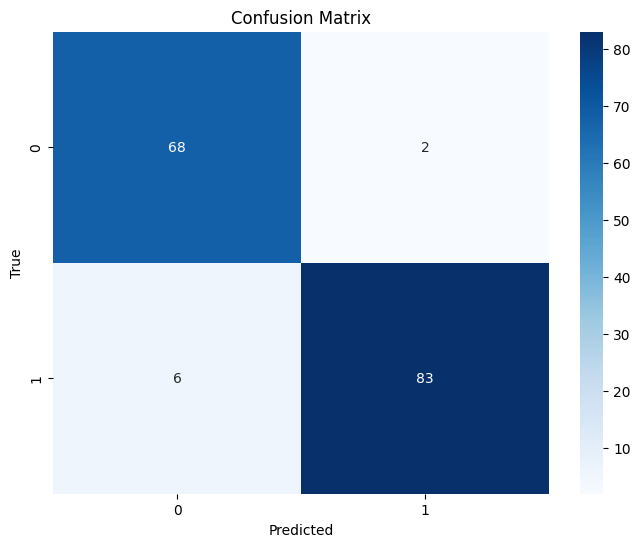

In [30]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [31]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.97      0.94        70
        True       0.98      0.93      0.95        89

    accuracy                           0.95       159
   macro avg       0.95      0.95      0.95       159
weighted avg       0.95      0.95      0.95       159



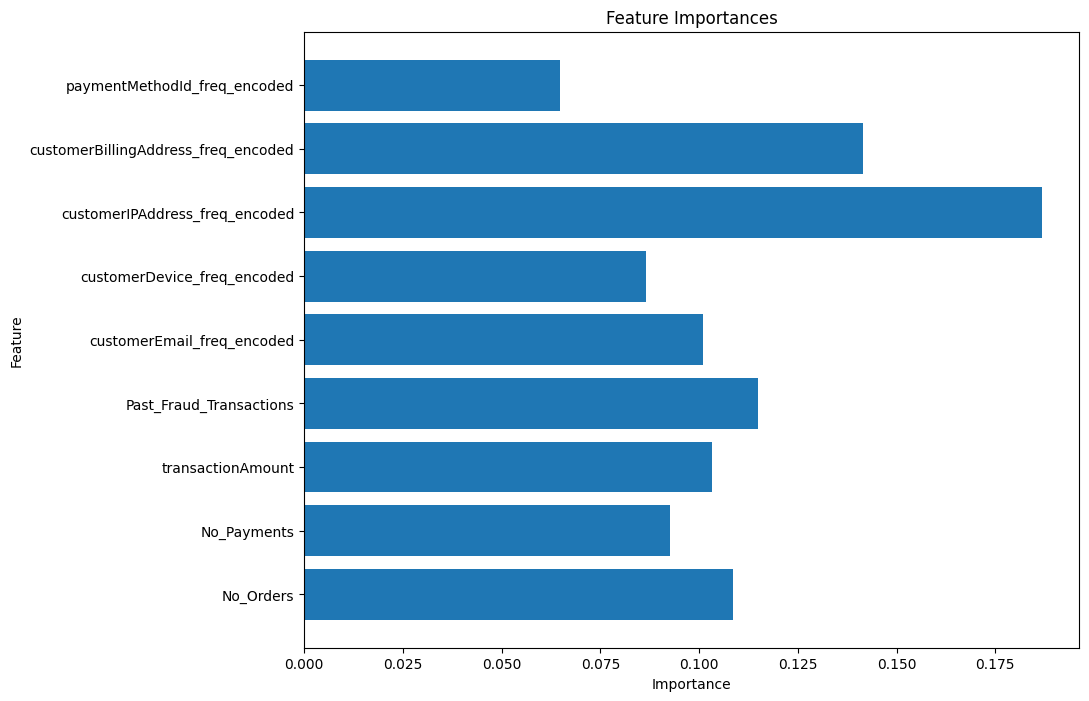

In [32]:
# Extract feature importances from the model
feature_importances = rf_classifier.feature_importances_

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(selected_features, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()